In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the dataset

In [2]:
df = pd.read_csv("D:/project_batch25/logidtic_reg_dataset/diabetes2.csv")
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


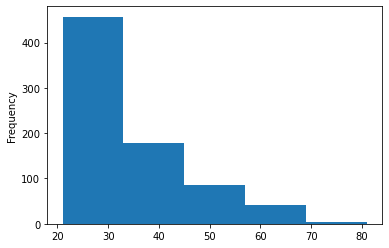

In [13]:
df['Age'].plot.hist(bins=5,xlabel='Age')
plt.show()

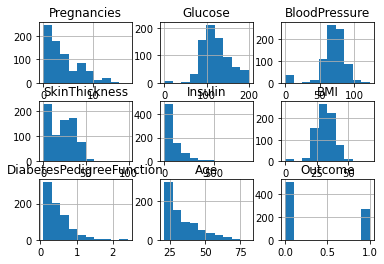

In [14]:
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].hist()
plt.show()

C:\Users\Varsha S\AppData\Local\Temp/ipykernel_6972/1416348817.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].hist(ax = ax)


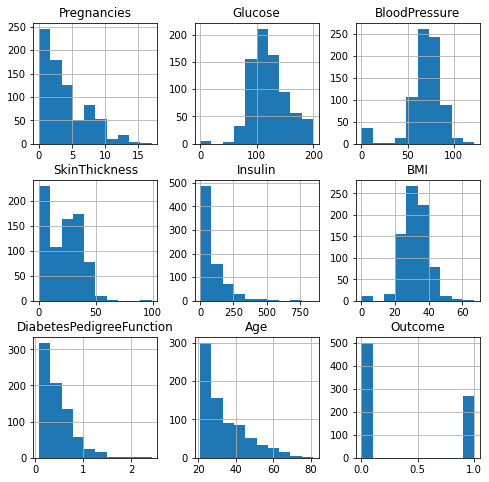

In [15]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()

df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].hist(ax = ax)
plt.show()

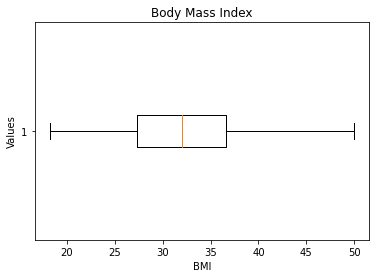

In [18]:
plt.boxplot(df.BMI, showfliers=False, vert=False)

## Customizing the plot
plt.title('Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Values')

plt.show()

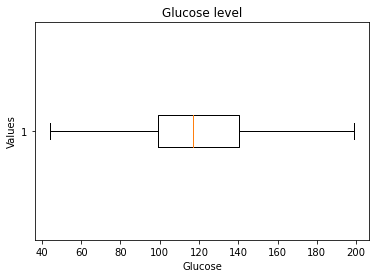

In [24]:
plt.boxplot(df.Glucose, showfliers=False, vert=False)

## Customizing the plot
plt.title('Glucose level')
plt.xlabel('Glucose')
plt.ylabel('Values')

plt.show()

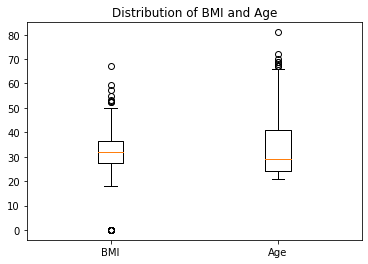

In [21]:
plt.boxplot([df['BMI'], df['Age']])

plt.title('Distribution of BMI and Age')
plt.xticks([1,2],['BMI','Age'])
plt.show()

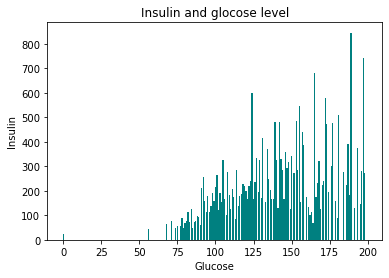

In [22]:
plt.bar(df['Glucose'],df['Insulin'], color='teal')

plt.ylabel('Insulin')
plt.xlabel('Glucose')
plt.title('Insulin and glocose level')

plt.show()

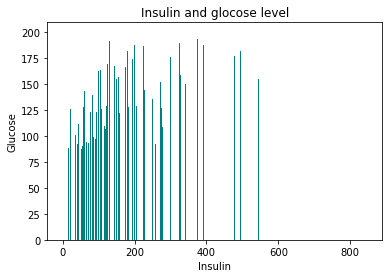

In [23]:
plt.bar(df['Insulin'],df['Glucose'], color='teal')

plt.ylabel('Glucose')
plt.xlabel('Insulin')
plt.title('Insulin and glocose level')

plt.show()

In [ ]:
base_color = sns.color_palette()[0]
sns.countplot(data = diabetes_clean, x = 'Outcome', color = base_color);

In [25]:
plt.figure(figsize = [10, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

# Checking for columns which have missing values

In [3]:
missing_cols = [col for col in df.columns if df[col].isnull().any()]
missing_cols

[]

# Independent and dependent variables

In [4]:
X = pd.DataFrame(df.iloc[:,0:8])
y = pd.DataFrame(df.iloc[:,8])

# Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelling

In [6]:
clf = LogisticRegression(max_iter=250)
clf.fit(X_train, y_train['Outcome'])

LogisticRegression(max_iter=250)

# Predicting on testing dataset

In [7]:
y_test_hat = clf.predict(X_test)
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# Confusion matrix for testing dataset

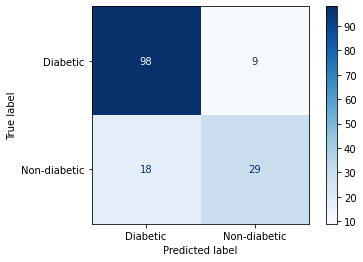

In [8]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Diabetic', 'Non-diabetic'],)

# Predicting on training dataset

In [9]:
y_train_hat = clf.predict(X_train)
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       393
           1       0.71      0.57      0.64       221

    accuracy                           0.76       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.76      0.76       614



# Confusion matrix for training dataset

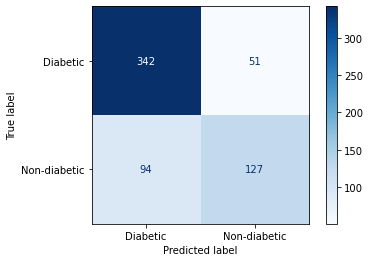

In [10]:
plot_confusion_matrix(clf, X_train, y_train, cmap=plt.cm.Blues, display_labels=['Diabetic', 'Non-diabetic'],)